In [30]:
# Wheel_setting = dict(
#     torque_curve=[
#         dict(x=-9.310944, y=743.000000),
#         dict(x=9000.000000, y=743.000000),
#         dict(x=9500.000000, y=660.000000),
#         dict(x=10400.000000, y=605.000000),
#         dict(x=12500.000000, y=528.000000),
#         dict(x=15000.000000, y=502.000000),
#     ],
#     max_rpm=15000.000000,
#     moi=1.000000,
#     damping_rate_full_throttle=0.150000,
#     damping_rate_zero_throttle_clutch_engaged=2.000000,
#     damping_rate_zero_throttle_clutch_disengaged=0.350000,
#     use_gear_autobox=True,
#     gear_switch_time=0.000000,
#     clutch_strength=10.000000,
#     final_ratio=9.000000,
#     forward_gears=[dict(ratio=1.000000, down_ratio=0.000000, up_ratio=0.000000)],
#     mass=1845.000000,
#     drag_coefficient=0.150000,
#     center_of_mass=dict(x=0.450000, y=0.000000, z=-0.300000),
#     steering_curve=[
#         dict(x=0.000000, y=1.000000),
#         dict(x=20.000000, y=0.900000),
#         dict(x=60.000000, y=0.800000),
#         dict(x=120.000000, y=0.700000),
#     ],
#     wheels=[
#         dict( # front left
#             tire_friction=3.500000,
#             damping_rate=0.250000,
#             max_steer_angle=69.999992,
#             radius=37.000000,
#             max_brake_torque=700.000000,
#             max_handbrake_torque=0.000000,
#             lat_stiff_max_load=3.000000,
#             lat_stiff_value=20.000000,
#             long_stiff_value=3000.000000,
#             position=dict(x=-230.360107, y=-1484.240234, z=53.834698),
#         ),
#         dict( # front right
#             tire_friction=3.500000,
#             damping_rate=0.250000,
#             max_steer_angle=69.999992,
#             radius=37.000000,
#             max_brake_torque=700.000000,
#             max_handbrake_torque=0.000000,
#             lat_stiff_max_load=3.000000,
#             lat_stiff_value=20.000000,
#             long_stiff_value=3000.000000,
#             position=dict(x=-63.677315, y=-1484.240356, z=53.669857),
#         ),
#         dict( # rear left
#             tire_friction=3.500000,
#             damping_rate=0.250000,
#             max_steer_angle=0.000000,
#             radius=37.000000,
#             max_brake_torque=700.000000,
#             max_handbrake_torque=1400.000000,
#             lat_stiff_max_load=3.000000,
#             lat_stiff_value=20.000000,
#             long_stiff_value=3000.000000,
#             position=dict(x=-230.360168, y=-1183.775757, z=53.750481),
#         ),
#         dict( # rear right
#             tire_friction=3.500000,
#             damping_rate=0.250000,
#             max_steer_angle=0.000000,
#             radius=37.000000,
#             max_brake_torque=700.000000,
#             max_handbrake_torque=1400.000000,
#             lat_stiff_max_load=3.000000,
#             lat_stiff_value=20.000000,
#             long_stiff_value=3000.000000,
#             position=dict(x=-63.677383, y=-1183.775757, z=53.581860),
#         ),
#     ],
#     use_sweep_wheel_collision=0,
# )
# # export to json
# import json
# with open('wheel_setting.json', 'w') as f:
#     json.dump(Wheel_setting, f, indent=4)
    
# load from json
import json
from pprint import pprint
import numpy as np
with open('wheel_setting.json', 'r') as f:
    Wheel_setting = json.load(f)
# pprint(Wheel_setting)
L = abs(Wheel_setting['wheels'][0]['position']['y'] - Wheel_setting['wheels'][2]['position']['y'])
T = abs(Wheel_setting['wheels'][0]['position']['x'] - Wheel_setting['wheels'][1]['position']['x'])
theta1 = np.radians(69.99)
theta2 = np.radians(47.95)

R = (L/np.sin(theta2) + np.sqrt((L/np.tan(theta1) + T)**2 + L**2))/2
R, L, T

(406.345498866564, 300.464477, 166.682792)

# Relation between params

In [7]:
# transform data/log to xlsx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [60]:
# Convert_log_to_xlsx.py
import pandas as pd
"""
{'AngularVelocity': array([-4.37428025e-06,  6.01823886e-05, -7.62434183e-06]),
 'BL_Wheel_Angle': 0.0,
 'BR_Wheel_Angle': 0.0,
 'FL_Wheel_Angle': 0.0,
 'FR_Wheel_Angle': 0.0,
 'Location': array([ -2.13139057, -13.58492756,   0.16977863]),
 'Rotation': array([ 2.82769813e-03, -8.76779175e+01,  6.53911904e-02]),
 'Velocity': array([5.51639096e-06, 9.15236285e-07, 5.89568799e-06]),
 'brake_input': 0.0,
 'camera_location': array([-2.73157787, 17.28938675, -1.66063035]),
 'camera_rotation': array([-14.0348835 ,  -0.6602667 ,  -0.08262103]),
 'current_gear_input': False,
 'focus_actor_dist': 687.36474609375,
 'focus_actor_name': 'Road_Grass_Town05_123',
 'focus_actor_pt': array([ -199.36732483, -2041.00537109,    17.01990509]),
 'frame': 17268,
 'frame_number': 17268,
 'framesequence': 66642,
 'gaze_dir': array([0.99712372, 0.02189636, 0.05830383]),
 'gaze_origin': array([-3.93994713, -0.01803055, -0.53388059]),
 'gaze_valid': True,
 'gaze_vergence': 0.7961492538452148,
 'handbrake_input': False,
 'left_eye_openness': 1.0,
 'left_eye_openness_valid': True,
 'left_gaze_dir': array([0.99966431, 0.02079773, 0.01531982]),
 'left_gaze_origin': array([-3.71361256,  2.82757282, -0.55886388]),
 'left_gaze_valid': True,
 'left_pupil_diam': 3.4825439453125,
 'left_pupil_posn': array([ 0.31178343, -0.64217329]),
 'left_pupil_posn_valid': True,
 'right_eye_openness': 1.0,
 'right_eye_openness_valid': True,
 'right_gaze_dir': array([0.99458313, 0.022995  , 0.10128784]),
 'right_gaze_origin': array([-4.16628122, -2.86363387, -0.50889742]),
 'right_gaze_valid': True,
 'right_pupil_diam': 3.1923370361328125,
 'right_pupil_posn': array([-0.23540282, -0.80398464]),
 'right_pupil_posn_valid': True,
 'steering_input': 0.0003295999194961041,
 'throttle_input': 0.0,
 'timestamp': 564.725004479289,
 'timestamp_carla': 564726,
 'timestamp_device': 3718156,
 'timestamp_stream': 564.725004479289,
 'transform': [array([2.11354113e+00, 1.51294756e+01, 5.36903366e-03]),
               array([-0.06390325, -7.67797327,  0.01413985])]}
"""

tab = {
    'timestamp_carla': [],
    'timestamp_device': [],
    'frame_number': [],
    'brake_input': [],
    'steering_input': [],
    'throttle_input': [],
    'LocationX': [],
    'LocationY': [],
    'LocationZ': [],
    'RotationRoll': [],
    'RotationPitch': [],
    'RotationYaw': [],
    'AngularVelocityX': [],
    'AngularVelocityY': [],
    'AngularVelocityZ': [],
    'VelocityX': [],
    'VelocityY': [],
    'VelocityZ': [],
    'transformX': [],
    'transformY': [],
    'transformZ': [],
    'transformRoll': [],
    'transformPitch': [],
    'transformYaw': [],  
    'FL_Wheel_Angle': [],
    'FR_Wheel_Angle': [],
    'BL_Wheel_Angle': [],
    'BR_Wheel_Angle': [],  
}

log = 'data/trials/trial12.txt'

with open(log) as rf:
    lines = rf.readlines()
    
    for line in lines:
        if 'brake_input' in line and 'handbrake_input' not in line:
            tab['brake_input'].append(float(line.split(': ')[1].split(',')[0]))
        if 'steering_input' in line:
            tab['steering_input'].append(float(line.split(': ')[1].split(',')[0]))
        if 'throttle_input' in line:
            tab['throttle_input'].append(float(line.split(': ')[1].split(',')[0]))
        if 'timestamp_carla' in line:
            tab['timestamp_carla'].append(float(line.split(': ')[1].split(',')[0]))
        if 'timestamp_device' in line:
            tab['timestamp_device'].append(float(line.split(': ')[1].split(',')[0]))
        if 'frame_number' in line:
            tab['frame_number'].append(int(line.split(': ')[1].split(',')[0]))
        if 'transform' in line:
            # print(line.split('[')[2])
            transform_data = line.split('[')[2].split(']')[0].split(',')
            tab['transformX'].append(float(transform_data[0]))
            tab['transformY'].append(float(transform_data[1]))
            tab['transformZ'].append(float(transform_data[2]))
            
        if '}' in line:
            rpy_data = line.split('[')[1].split(']')[0].split(',')
            tab['transformPitch'].append(float(rpy_data[0]))
            tab['transformYaw'].append(float(rpy_data[1]))
            tab['transformRoll'].append(float(rpy_data[2]))
            
        if 'Location' in line:
            location_data = line.split('[')[1].split(']')[0].split(',')
            tab['LocationX'].append(float(location_data[0]))
            tab['LocationY'].append(float(location_data[1]))
            tab['LocationZ'].append(float(location_data[2]))
            
        if 'Rotation' in line:
            rpy_data = line.split('[')[1].split(']')[0].split(',')
            tab['RotationPitch'].append(float(rpy_data[0]))
            tab['RotationYaw'].append(float(rpy_data[1]))
            tab['RotationRoll'].append(float(rpy_data[2]))
        
        if 'Velocity' in line and 'AngularVelocity' not in line:
            v_data = line.split('[')[1].split(']')[0].split(',')
            tab['VelocityX'].append(float(v_data[0]))
            tab['VelocityY'].append(float(v_data[1]))
            tab['VelocityZ'].append(float(v_data[2]))
            
        if 'AngularVelocity' in line:
            av_data = line.split('[')[1].split(']')[0].split(',')
            tab['AngularVelocityX'].append(float(av_data[0]))
            tab['AngularVelocityY'].append(float(av_data[1]))
            tab['AngularVelocityZ'].append(float(av_data[2]))      
            
        if 'FL_Wheel_Angle' in line:
            tab['FL_Wheel_Angle'].append(float(line.split(': ')[1].split(',')[0]))
        if 'FR_Wheel_Angle' in line:
            tab['FR_Wheel_Angle'].append(float(line.split(': ')[1].split(',')[0]))
        if 'BL_Wheel_Angle' in line:
            tab['BL_Wheel_Angle'].append(float(line.split(': ')[1].split(',')[0]))
        if 'BR_Wheel_Angle' in line:
            tab['BR_Wheel_Angle'].append(float(line.split(': ')[1].split(',')[0]))
            
        

# print(tab)
# for key in tab:
#     print(key, len(tab[key]))
df = pd.DataFrame().from_dict(tab)
df.to_excel(log.replace('.txt', '.xlsx'), index=False)
df.head()

,timestamp_carla,timestamp_device,frame_number,brake_input,steering_input,throttle_input,LocationX,LocationY,LocationZ,RotationRoll,...,transformX,transformY,transformZ,transformRoll,transformPitch,transformYaw,FL_Wheel_Angle,FR_Wheel_Angle,BL_Wheel_Angle,BR_Wheel_Angle
0,671804.0,115049.0,20759,0.0,0.004999,0.0,-3.468346,-30.757145,0.172826,-0.062805,...,-1.488692,-17.599632,0.010310,0.017639,-0.062804,-2.211353,0.000000,0.000000,0.0,0.0
1,671838.0,115083.0,20760,0.0,0.005072,0.0,-3.468346,-30.757145,0.172807,-0.062805,...,-1.488692,-17.599632,0.010297,0.017639,-0.062804,-2.211353,0.000000,0.994583,0.0,0.0
2,671872.0,115116.0,20761,0.0,0.005200,0.0,-3.468234,-30.755255,0.172816,-0.062775,...,-1.488692,-17.599632,0.010297,0.017639,-0.062804,-2.211353,0.000000,0.000000,0.0,0.0
3,671905.0,115158.0,20762,0.0,0.005713,0.0,-3.468067,-30.751295,0.172790,-0.062775,...,-1.488692,-17.599632,0.010302,0.017639,-0.062804,-2.211353,0.787287,0.820276,0.0,0.0
4,671938.0,115183.0,20763,0.0,0.006665,0.0,-3.467991,-30.746983,0.172831,-0.062836,...,-1.488692,-17.599632,0.010301,0.017639,-0.062804,-2.211353,1.444498,1.716230,0.0,0.0


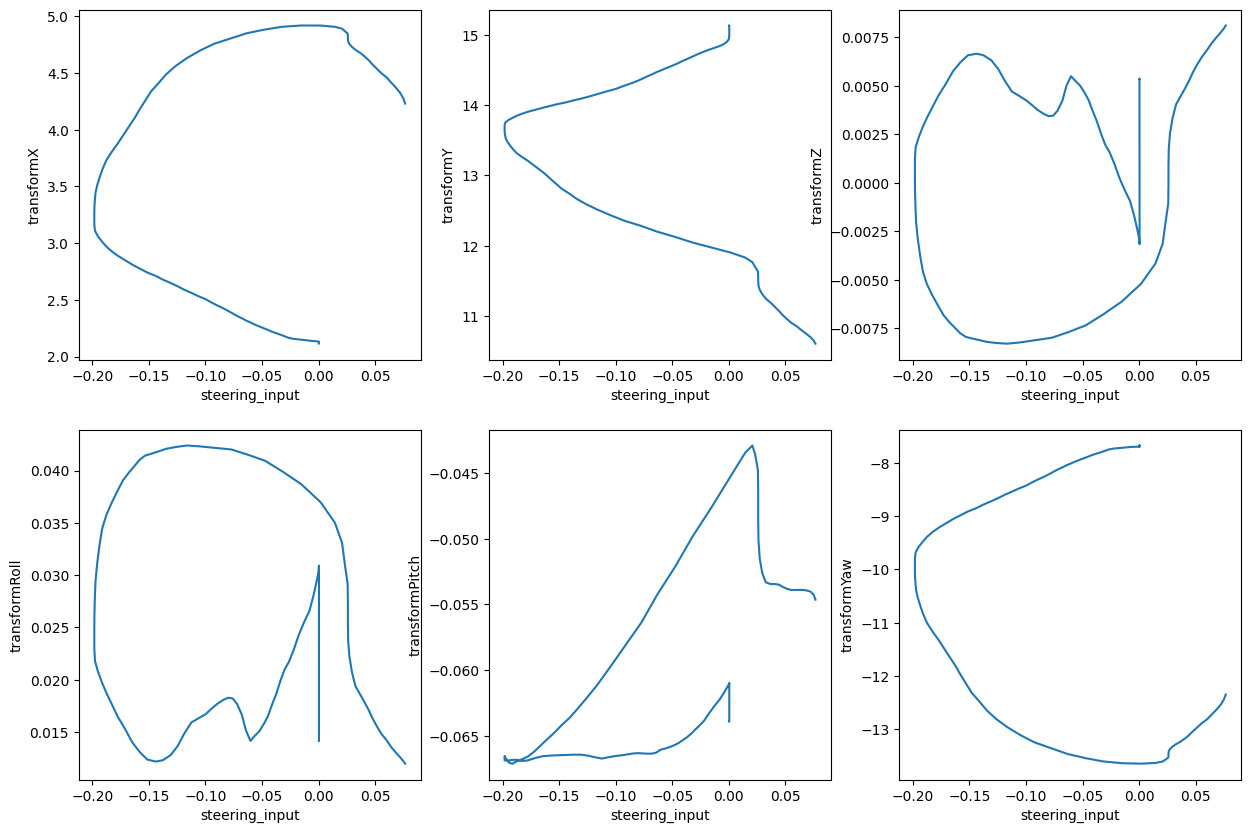

In [ ]:
# plot transform x, y, z, roll, pitch, yaw figures Steering is X-axis and those are Y-axis
df = pd.read_excel('./data/trials/trial1.xlsx')
df[abs(df["throttle_input"]) > 1e-3]

plt.style.use('default')
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.plot(df['steering_input'], df['transformX'])
plt.xlabel('steering_input')
plt.ylabel('transformX')
plt.subplot(2, 3, 2)
plt.plot(df['steering_input'], df['transformY'])
plt.xlabel('steering_input')
plt.ylabel('transformY')
plt.subplot(2, 3, 3)
plt.plot(df['steering_input'], df['transformZ'])
plt.xlabel('steering_input')
plt.ylabel('transformZ')
plt.subplot(2, 3, 4)
plt.plot(df['steering_input'], df['transformRoll'])
plt.xlabel('steering_input')
plt.ylabel('transformRoll')
plt.subplot(2, 3, 5)
plt.plot(df['steering_input'], df['transformPitch'])
plt.xlabel('steering_input')
plt.ylabel('transformPitch')
plt.subplot(2, 3, 6)
plt.plot(df['steering_input'], df['transformYaw'])
plt.xlabel('steering_input')
plt.ylabel('transformYaw')
plt.show()


In [ ]:
10
238
# 12 lines / seconds
1609


9 
353
1725

In [115]:
1728/12

144.0

In [17]:
def plot_data_old(df):
    plt.style.use('default')
    plt.figure(figsize=(15, 10))
    plt.subplot(4, 2, 1)
    plt.plot(df['timestamp_carla'], df['transformX'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('transformX')
    plt.grid()

    plt.subplot(4, 2, 2)
    plt.plot(df['timestamp_carla'], df['transformRoll'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('transformRoll')
    plt.grid()

    plt.subplot(4, 2, 3)
    plt.plot(df['timestamp_carla'], df['transformY'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('transformY')
    plt.grid()

    plt.subplot(4, 2, 4)
    plt.plot(df['timestamp_carla'], df['transformPitch'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('transformPitch')
    plt.grid()

    plt.subplot(4, 2, 5)
    plt.plot(df['timestamp_carla'], df['transformZ'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('transformZ')
    plt.grid()

    plt.subplot(4, 2, 6)
    plt.plot(df['timestamp_carla'], df['transformYaw'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('transformYaw')
    plt.grid()

    plt.subplot(4, 2, 7)
    plt.plot(df['timestamp_carla'], df['throttle_input'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('throttle_input')
    plt.grid()

    plt.subplot(4, 2, 8)
    plt.plot(df['timestamp_carla'], df['steering_input'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('steering_input')
    plt.grid()

    plt.tight_layout()
    plt.show()

def plot_data(df):
    plt.style.use('default')
    plt.figure(figsize=(15, 10))
    plt.subplot(4, 2, 1)
    plt.plot(df['timestamp_carla'], df['LocationX'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('LocationX')
    plt.grid()

    plt.subplot(4, 2, 3)
    plt.plot(df['timestamp_carla'], df['LocationY'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('LocationY')
    plt.grid()

    plt.subplot(4, 2, 5)
    plt.plot(df['timestamp_carla'], df['LocationZ'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('LocationZ')
    plt.grid()

    plt.subplot(4, 2, 2)
    plt.plot(df['timestamp_carla'], df['RotationPitch'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('RotationPitch')
    plt.grid()

    plt.subplot(4, 2, 4)
    plt.plot(df['timestamp_carla'], df['RotationRoll'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('RotationRoll')
    plt.grid()

    plt.subplot(4, 2, 6)
    plt.plot(df['timestamp_carla'], df['RotationYaw'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('RotationYaw')
    plt.grid()

    plt.subplot(4, 2, 7)
    plt.plot(df['timestamp_carla'], df['throttle_input'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('throttle_input')
    plt.grid()

    plt.subplot(4, 2, 8)
    plt.plot(df['timestamp_carla'], df['steering_input'])
    plt.xlabel('timestamp_carla')
    plt.ylabel('steering_input')
    plt.grid()

    plt.tight_layout()
    plt.show()


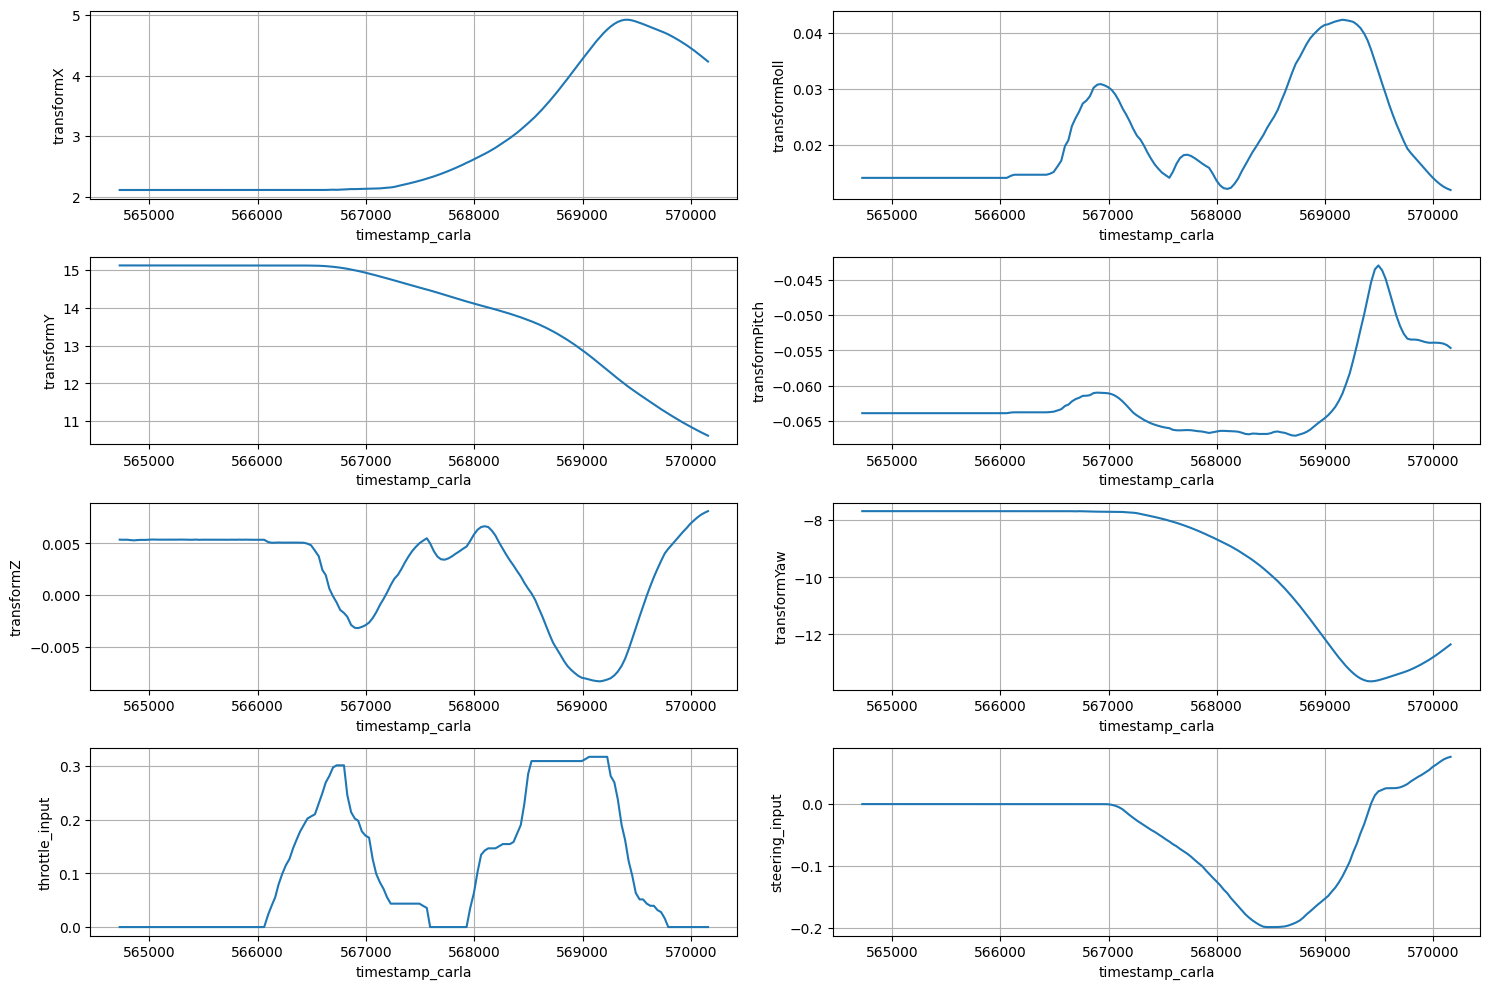

In [18]:
# plot transform x, y, z, roll, pitch, yaw figures Steering is X-axis and those are Y-axis
df = pd.read_excel('./data/log/trial1.xlsx')
# df = df.iloc[310:310+42*30]
# df = df.iloc[410:410+42*30]
plot_data_old(df)

# min(df['steering_input']), max(df['steering_input']), min(df['transformYaw']), max(df['transformYaw']), len(df)

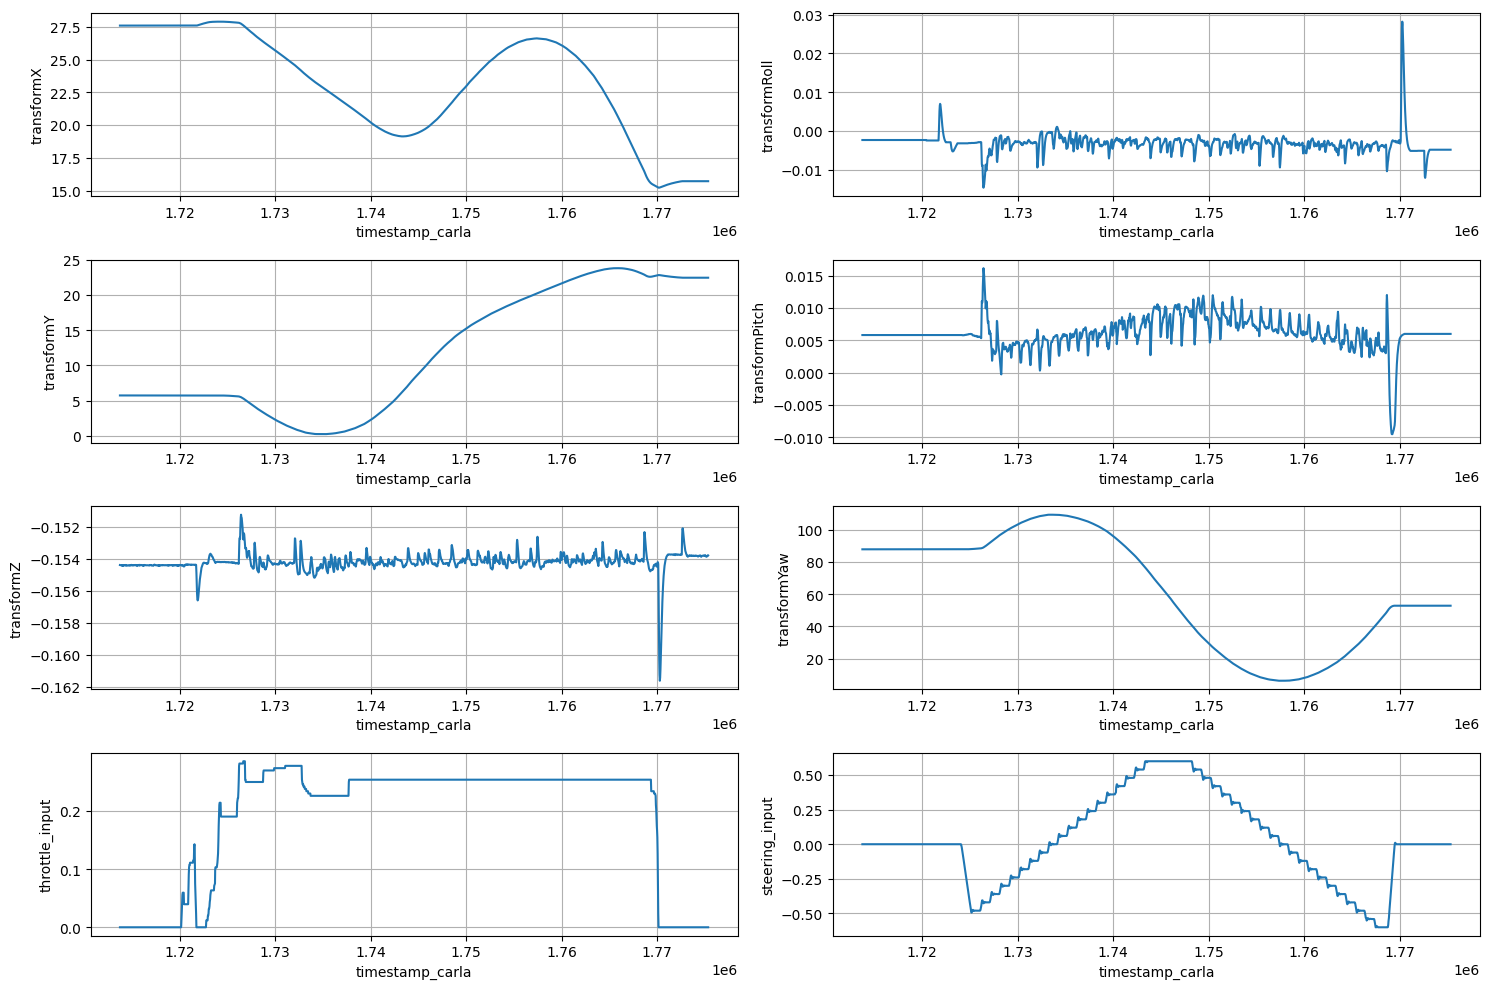

In [220]:
# plot transform x, y, z, roll, pitch, yaw figures Steering is X-axis and those are Y-axis
df = pd.read_excel('./data/log_backward.xlsx')
# df = df.iloc[310:310+42*30]
# df = df.iloc[410:410+42*30]
plot_data_old(df)

### Plot the path from trial files

P_s: 	 -2.21546435 	 -31.60477066
P_d: 	 1.03518212 	 -18.32664871
P_f: 	 -7.7015214 	 -21.18217278


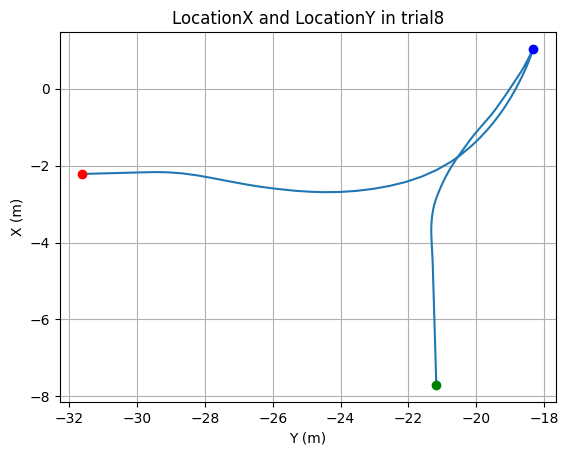

In [79]:
# plot locationX and Y

df = pd.read_excel('./data/trials/trial8.xlsx')
x = df['LocationX'].to_list()
y = df['LocationY'].to_list()
plt.plot(y, x)
plt.xlabel('Y (m)')
plt.ylabel('X (m)')
plt.plot(y[0], x[0], 'ro')
plt.plot(y[x.index(min(x))], min(x), 'go')
# find plot the turning point
plt.plot(y[x.index(max(x))], max(x), 'bo')

print("P_s: \t", x[0],  "\t", y[0])
print("P_d: \t", max(x),"\t", y[x.index(max(x))])
print("P_f: \t", min(x),"\t", y[x.index(min(x))])


plt.title('LocationX and LocationY in trial8')
plt.grid()
plt.show()
plt.close()

## Plots from wheel sensor data

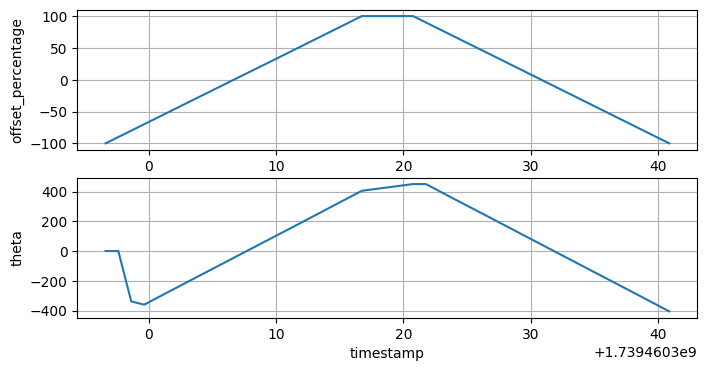

1260


In [ ]:
df_spin = pd.read_excel('./data/spin_test_offset4.xlsx')
plt.style.use('default')
df_spin_repeated = df_spin.loc[df_spin.index.repeat(30)].reset_index(drop=True)
df_spin_repeated['timestamp_carla'] = df["timestamp_carla"]
df_spin_repeated['wheel_angle'] =  df_spin_repeated['x-axis positions'] * 450 / 32767
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(df_spin_repeated['timestamp'], df_spin_repeated['offset_percentage'])
plt.xlabel('timestamp')
plt.ylabel('offset_percentage')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df_spin_repeated['timestamp'], df_spin_repeated['x-axis positions'] * 450 / 32767)
plt.xlabel('timestamp')
plt.ylabel('theta')
plt.grid()
plt.show()
print(len(df_spin_repeated))

## Plots the relationship between measured data
1. Input: (logitech) steering wheel angle offset ~ Measured: (logitech) steering wheel angle
2. Input: (logitech) steering wheel angle ~ Measured: (carla) steering input
3. Input: (carla) steering input ~ Measured: (carla) steering angle 
4. Input: (carla) steering angle ~ Measured: change of yaw angles (vehicle angle)

Linear Relation: Y = 0.000511 * X + 0.030352


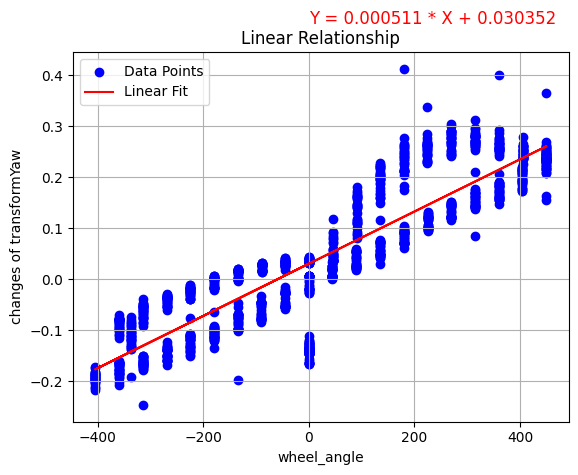

In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_excel('./data/log_9.xlsx')
df = df.iloc[410:410+42*30]
# df = df.iloc[310:310+42*30]

# Extract X and Y
X = df_spin_repeated[['wheel_angle']]  # Feature must be 2D
Y = df['transformYaw'].diff().fillna(0)  # Target can be 1D
# Linear Regression Model
model = LinearRegression()
model.fit(X, Y)

# Coefficient and Intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Relation: Y = {slope:.6f} * X + {intercept:.6f}")

# Predicted Y values
Y_pred = model.predict(X)

# Plot the data and linear fit
# show equation on the plot

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Linear Fit')
plt.text(0.1, 0.5, f'Y = {slope:.6f} * X + {intercept:.6f}', fontsize=12, color='red')
plt.xlabel('wheel_angle')
plt.ylabel('changes of transformYaw')
plt.title('Linear Relationship')
plt.legend()
plt.grid(True)
plt.show()


## **Bezier curve**



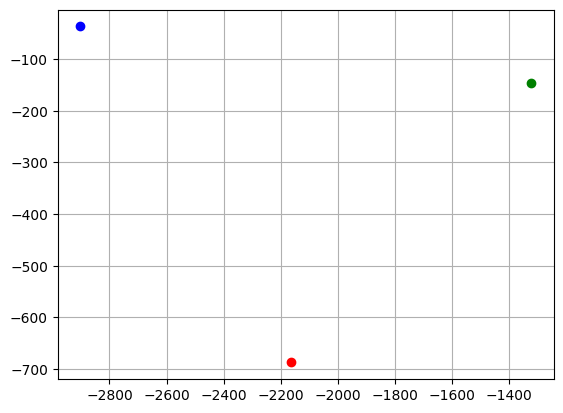

In [8]:
import matplotlib.pyplot as plt
plt.style.use('default')

P_0 = [-147.066772, -1322.415039] # [y, x]
P_f = [-687.066772, -2162.415039]
P_d = [-37.066772 , -2902.415039]

yaw_0 = 0
yaw_d = 10
yaw_f = 90

vel = 2.0 # km/h

#plot points
plt.figure()

plt.plot(P_0[1], P_0[0], 'go')
plt.plot(P_d[1], P_d[0], 'bo')
plt.plot(P_f[1], P_f[0], 'ro')
plt.grid()

plt.show()

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
import bezier as B


def calc_control_points_bezier_path(sx, sy, s_yaw, ex, ey, e_yaw, l_d, l_f, n_points=100):
    """
    Compute control points and path given start and end position.

    :param sx: (float) x-coordinate of the starting point
    :param sy: (float) y-coordinate of the starting point
    :param s_yaw: (float) yaw angle at start
    :param ex: (float) x-coordinate of the ending point
    :param ey: (float) y-coordinate of the ending point
    :param e_yaw: (float) yaw angle at the end

    :return: (numpy array, numpy array)
    """

    control_points = np.array(
        [
            [sx, sy],
            [sx - l_d * np.cos(s_yaw), sy + l_d * np.sin(s_yaw)],
            [ex + l_f * np.cos(e_yaw), ey - l_f * np.sin(e_yaw)],
            [ex, ey],
        ]
    )

    paths = calc_bezier_path(control_points, n_points=n_points)

    return paths, control_points


def calc_bezier_path(control_points, n_points=100):
    """
    Compute bezier path (trajectory) given control points.

    :param control_points: (numpy array)
    :param n_points: (int) number of points in the trajectory
    :return: (numpy array)
    """
    trajectory = []
    d_trajectory = []
    dd_trajectory = []

    for u in np.linspace(0, 1, n_points):
        point = bezier(u, control_points)

        derivatives_cp = bezier_derivatives_control_points(control_points, 2)
        dt = bezier(u, derivatives_cp[1])
        ddt = bezier(u, derivatives_cp[2])

        trajectory.append(point)
        d_trajectory.append(dt)
        dd_trajectory.append(ddt)

    return [np.array(trajectory), np.array(d_trajectory), np.array(dd_trajectory)]


def bernstein_poly(n, i, u):
    """
    Bernstein polynomials.

    :param n: (int) polynomial degree
    :param i: (int)
    :param u: (float)
    :return: (float)
    """
    return scipy.special.comb(n, i) * (u**i) * ((1 - u) ** (n - i))


def bezier(u, control_points):
    """
    Return one point on the bezier curve.

    :param u: (float) number in [0, 1]
    :param control_points: (numpy array)
    :return: (numpy array) Coordinates of the point
    """
    n = len(control_points) - 1
    return np.sum([bernstein_poly(n, i, u) * control_points[i] for i in range(n + 1)], axis=0)


def bezier_derivatives_control_points(control_points, n_derivatives):
    """
    Compute control points of the successive derivatives of a given bezier curve.

    A derivative of a bezier curve is a bezier curve.
    See https://pomax.github.io/bezierinfo/#derivatives
    for detailed explanations

    :param control_points: (numpy array)
    :param n_derivatives: (int)
    e.g., n_derivatives=2 -> compute control points for first and second derivatives
    :return: ([numpy array])
    """
    w = {0: control_points}
    for i in range(n_derivatives):
        n = len(w[i])
        w[i + 1] = np.array([(n - 1) * (w[i][j + 1] - w[i][j]) for j in range(n - 1)])
    return w


def calc_curvature(dx, dy, ddx, ddy):
    """k_max
    Compute curvature at one point given first and second derivatives.

    :param dx: (float) First derivative along x axis
    :param dy: (float)
    :param ddx: (float) Second derivative along x axis
    :param ddy: (float)
    :return: (float)
    """
    return (dx * ddy - dy * ddx) / (dx**2 + dy**2) ** (3 / 2)


def plot_arrow(x, y, yaw, length=1.0, width=0.5, fc="r", ec="k"):  # pragma: no cover
    """Plot arrow."""
    if not isinstance(x, float):
        for ix, iy, iyaw in zip(x, y, yaw):
            plot_arrow(ix, iy, iyaw)
    else:
        plt.arrow(
            x,
            y,
            length * np.cos(yaw),
            length * np.sin(yaw),
            fc=fc,
            ec=ec,
            head_width=width,
            head_length=width,
        )
        plt.plot(x, y)


def calculate_bezier_trajectory(
    start_pos,
    end_pos,
    start_yaw,
    end_yaw,
    n_points,
    turning_radius,
    max_res=10,
    show_animation=True,
):
    start_x, start_y = start_pos
    end_x, end_y = end_pos
    start_yaw = np.radians(start_yaw)
    end_yaw = np.radians(end_yaw)

    dist = np.hypot(end_x - start_x, end_y - start_y)  # distance between start and end

    trajectories = {}
    # Find the optimal l_d and l_f: assume that ld and lf in range of [dist/4, ]
    for l_d in np.linspace(dist/5, dist, max_res):
        for l_f in np.linspace(dist/5, dist, max_res):

            paths, control_points = calc_control_points_bezier_path(
                start_x, start_y, start_yaw, end_x, end_y, end_yaw, l_d, l_f, n_points=n_points
            )
            path, d_path, dd_path = paths
            control_points = np.asfortranarray(control_points)

            curve = B.Curve(control_points.T, degree=3)
            length = curve.length

            # Display the tangent, normal and radius of curvature at a given point
            curvatures = []
            for i, u in enumerate(np.linspace(0, 1, n_points)):
                curvatures.append(
                    calc_curvature(d_path[i][0], d_path[i][1], dd_path[i][0], dd_path[i][1])
                )

            max_curvature = max(curvatures)
            
            if abs(1 / max_curvature) >= turning_radius:
                trajectories[(l_d, l_f)] = length
                # print(f"l_d: {l_d}, l_f: {l_f}, length: {length}, radius: {abs(1 / max_curvature)}")

    l_f, l_d = min(trajectories, key=trajectories.get)

    paths, control_points = calc_control_points_bezier_path(
        start_x, start_y, start_yaw, end_x, end_y, end_yaw, l_d, l_f
    )
    path, _ , __ = paths
    
    # Display the tangent, normal and radius of curvature at a given point
    radius_list = []
    tangent_list = []
    normal_list = []
    curvature_center_list = []
    
    
    for i, u in enumerate(np.linspace(0, 1, n_points)):
        x_target, y_target = bezier(u, control_points)
        derivatives_cp = bezier_derivatives_control_points(control_points, 2)
        point = bezier(u, control_points)
        dt = bezier(u, derivatives_cp[1])
        ddt = bezier(u, derivatives_cp[2])

        # Radius of curvature
        radius = 1 / calc_curvature(dt[0], dt[1], ddt[0], ddt[1])

        # Normalize derivative
        dt /= np.linalg.norm(dt, 2)
        tangent = np.array([point, point + dt])
        normal = np.array([point, point + [-dt[1], dt[0]]])
        curvature_center = point + np.array([-dt[1], dt[0]]) * radius
        
        radius_list.append(radius)
        tangent_list.append(tangent)
        normal_list.append(normal)
        curvature_center_list.append(curvature_center)
        
    circle = plt.Circle(
        tuple(curvature_center_list[-1]), radius_list[-1], color=(0, 0.8, 0.8), fill=False, linewidth=1
    )

    assert path.T[0][0] == start_x, "path is invalid"
    assert path.T[1][0] == start_y, "path is invalid"
    assert path.T[0][-1] == end_x, "path is invalid"
    assert path.T[1][-1] == end_y, "path is invalid"

    path_params = {
        "path": path,
        "control_points": control_points,
        "start_x": start_x,
        "start_y": start_y,
        "end_x": end_x,
        "end_y": end_y,
        "start_yaw": start_yaw,
        "end_yaw": end_yaw,
        "x_target": x_target,
        "y_target": y_target,
        "dist": dist,
        "radius": radius_list,
        "tangent": tangent_list,
        "normal": normal_list,
        "curvature_center": curvature_center_list,
        "circle": circle,        
    }

    if show_animation:  # pragma: no cover
        fig, ax = plt.subplots()
        ax.plot(path.T[0], path.T[1], label="Bezier Path")
        ax.plot(control_points.T[0], control_points.T[1], "--o", label="Control Points")
        ax.plot(x_target, y_target)
        ax.plot(tangent[:, 0], tangent[:, 1], label="Tangent")
        ax.plot(normal[:, 0], normal[:, 1], label="Normal")
        ax.add_artist(circle)
        plot_arrow(start_x, start_y, np.pi - start_yaw, length=0.1 * dist, width=0.05 * dist)
        plot_arrow(end_x, end_y, np.pi - end_yaw, length=0.1 * dist, width=0.05 * dist)
        ax.legend()
        ax.axis("equal")
        ax.grid(True)
        plt.show()

    return path, control_points, path_params

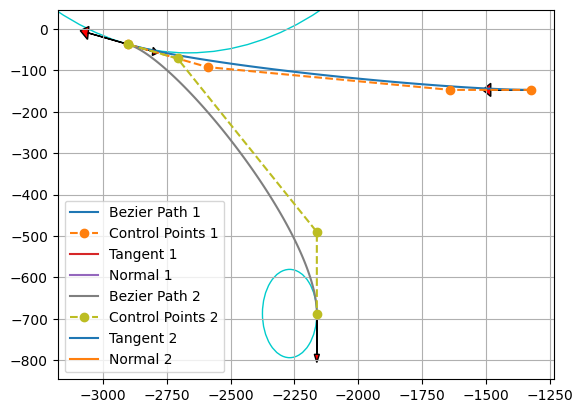

In [17]:
n_points = 100
path1, control_points1, params1 = calculate_bezier_trajectory(
    start_pos=P_0[::-1],
    end_pos=P_d[::-1],
    start_yaw=yaw_0,
    end_yaw=yaw_d,
    n_points=n_points,
    turning_radius=R,
    show_animation=False,
)
# backward so reverse the yaw angle (+180)
path2, control_points2, params2 = calculate_bezier_trajectory(
    start_pos=P_d[::-1],
    end_pos=P_f[::-1],
    start_yaw=180 + yaw_d,
    end_yaw=180 + yaw_f,
    n_points=n_points,
    turning_radius=R,
    show_animation=False,
)

# show 2 path in same plot
plt.figure()
plt.plot(path1.T[0], path1.T[1], label="Bezier Path 1")
plt.plot(control_points1.T[0], control_points1.T[1], "--o", label="Control Points 1")
plt.plot(params1["x_target"], params1["y_target"])
plt.plot(params1["tangent"][-1][:, 0], params1["tangent"][-1][:, 1], label="Tangent 1")
plt.plot(params1["normal"][-1][:, 0], params1["normal"][-1][:, 1], label="Normal 1")
plt.gca().add_artist(params1["circle"])
plot_arrow(
    params1["start_x"],
    params1["start_y"],
    np.pi - params1["start_yaw"],
    length=0.1 * params1["dist"],
    width=0.02 * params1["dist"],
)
plot_arrow(
    params1["end_x"],
    params1["end_y"],
    np.pi - params1["end_yaw"],
    length=0.1 * params1["dist"],
    width=0.02 * params1["dist"],
)

plt.plot(path2.T[0], path2.T[1], label="Bezier Path 2")
plt.plot(control_points2.T[0], control_points2.T[1], "--o", label="Control Points 2")
plt.plot(params2["x_target"], params2["y_target"])
plt.plot(params2["tangent"][-1][:, 0], params2["tangent"][-1][:, 1], label="Tangent 2")
plt.plot(params2["normal"][-1][:, 0], params2["normal"][-1][:, 1], label="Normal 2")
plt.gca().add_artist(params2["circle"])
plot_arrow(
    params2["start_x"],
    params2["start_y"],
    np.pi - params2["start_yaw"],
    length=0.1 * params2["dist"],
    width=0.02 * params2["dist"],
)
plot_arrow(
    params2["end_x"],
    params2["end_y"],
    np.pi - params2["end_yaw"],
    length=0.1 * params2["dist"],
    width=0.02 * params2["dist"],
)

plt.legend()
plt.grid(True)
plt.show()
plt.close()

## Haptic shared control

In [34]:
Wheel_setting


{'torque_curve': [{'x': -9.310944, 'y': 743.0},
  {'x': 9000.0, 'y': 743.0},
  {'x': 9500.0, 'y': 660.0},
  {'x': 10400.0, 'y': 605.0},
  {'x': 12500.0, 'y': 528.0},
  {'x': 15000.0, 'y': 502.0}],
 'max_rpm': 15000.0,
 'moi': 1.0,
 'damping_rate_full_throttle': 0.15,
 'damping_rate_zero_throttle_clutch_engaged': 2.0,
 'damping_rate_zero_throttle_clutch_disengaged': 0.35,
 'use_gear_autobox': True,
 'gear_switch_time': 0.0,
 'clutch_strength': 10.0,
 'final_ratio': 9.0,
 'forward_gears': [{'ratio': 1.0, 'down_ratio': 0.0, 'up_ratio': 0.0}],
 'mass': 1845.0,
 'drag_coefficient': 0.15,
 'center_of_mass': {'x': 0.45, 'y': 0.0, 'z': -0.3},
 'steering_curve': [{'x': 0.0, 'y': 1.0},
  {'x': 20.0, 'y': 0.9},
  {'x': 60.0, 'y': 0.8},
  {'x': 120.0, 'y': 0.7}],
 'wheels': [{'tire_friction': 3.5,
   'damping_rate': 0.25,
   'max_steer_angle': 69.999992,
   'radius': 37.0,
   'max_brake_torque': 700.0,
   'max_handbrake_torque': 0.0,
   'lat_stiff_max_load': 3.0,
   'lat_stiff_value': 20.0,
   'lo

In [41]:
import numpy as np


def calculate_steering_mechanism(inner_wheel_steering_angle: float, outer_wheel_steering_angle: float, vehicle_config:dict) -> float:
    """
    Calculate the steering angle of the steering mechanism
    :param inner_wheel_steering_angle: The steering angle of the inner wheel
    :param outer_wheel_steering_angle: The steering angle of the outer wheel
    :param L: The distance between the wheels
    :param W: The distance between the front and rear wheels
    :return: The steering angle of the steering mechanism
    """
    L = abs(vehicle_config["wheels"][0]["position"]["x"] - vehicle_config["wheels"][2]["position"]["x"])
    W = abs(vehicle_config["wheels"][1]["position"]["y"] - vehicle_config["wheels"][0]["position"]["y"])
    a2 = L * vehicle_config["center_of_mass"]["x"] # center of mass
    R1 = np.sqrt(a2**2 + (L**2) * (cot(inner_wheel_steering_angle)**2))
    R2 = np.sqrt(a2**2 + (L**2) * (cot(outer_wheel_steering_angle)**2))
    
    delta = arccot((cot(inner_wheel_steering_angle) + cot(outer_wheel_steering_angle)) / 2)
    R = np.sqrt((a2 ** 2) + (R1 **2))
    return {"Turning Radius": R, "Steering Angle": delta}

def cot(x):
    return 1 / np.tan(x)

def arccot(x):
    # cspell: ignore arctan arccot
    return np.arctan(1 / x)

def simple_vehicle_model(steering_angles: float, vehicle_config: dict) -> dict:
    """
    Simple vehicle model to calculate the turning radius and steering angle
    :param steering_angle: The steering angle of the vehicle
    :param L: The distance between the wheels
    :param W: The distance between the front and rear wheels
    :return: The turning radius and steering angle
    """
    L = abs(vehicle_config["wheels"][0]["position"]["x"] - vehicle_config["wheels"][2]["position"]["x"])
    W = abs(vehicle_config["wheels"][1]["position"]["y"] - vehicle_config["wheels"][0]["position"]["y"])
    avg_steering_angle = sum(steering_angles) / len(steering_angles)
    avg_steering_angle = np.radians(avg_steering_angle)
    eps = 1e-6
    R = L / np.sin(avg_steering_angle + eps)
    return {"Turning Radius": R, "Steering Angle": avg_steering_angle}

import math
def getAngle(a, b, c, degrees=True):
    angle = math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0])
    return math.degrees(angle) if degrees else angle

a = (5, 0)
b = (0, 0)
c = (0, -5)
print(getAngle(a, b, c)) # result 90.0

-90.0


In [49]:
class HapticSharedControl:
    def __init__(self, Cs=0.5, Kc=0.5, T=1.0, tp=1.0, speed=2, desired_trajectory_params=[], vehicle_config={}):
        self.Cs = Cs
        self.Kc = Kc
        self.T = T

        self.tp = tp  # preview time
        self.speed = speed  # vehicle speed
        self.vehicle_config = vehicle_config # vehicle configuration

        self.desired_trajectory_params = desired_trajectory_params
        self.desired_trajectory = self.desired_trajectory_params["path"]

    def calculate_torque(self, current_position, steering_wheel_angles, current_yaw_angle, t):
        # calculate the average steering angle
        self.avg_steering_angle = self.calculate_avg_steering_angle(steering_wheel_angles)
        # calculate turning radius
        self.R = self.calculate_turning_radius(steering_wheel_angles)

        # Calculate the previewed driver model
        self.theta_d = self.preview_driver_model(current_position, current_yaw_angle, t)

        self.e_t = self.distance_to_trajectory(current_position, t)

        coef = self.sigmoid(self.Cs * self.e_t)
        
        desired_steering_angle = self.theta_d
        
        tau_das = - (self.Cs * self.e_t) * (self.avg_steering_angle - self.theta_d)

        return tau_das, coef, desired_steering_angle

    def preview_driver_model(self, current_position, current_yaw_angle, t, method="simple"):
        # Predict the position of the vehicle at the preview time
        self.predicted_position = self.predict_position(current_position, self.avg_steering_angle, current_yaw_angle)
        # Calculate the error between desired trajectory and predicted position with tp[s] ahead
        # todo: consider the sign of the error epsilon_tp_t
        self.epsilon_tp_t = self.distance_to_trajectory(self.predicted_position, t + self.tp) * self.get_sign_of_error(self.predicted_position, int(t))

        # Calculate the desired steering angle
        if method == 'simple':
            theta_d = self.Kc * self.epsilon_tp_t - self.avg_steering_angle
        else:
            theta_d_curr = self.avg_steering_angle
            theta_d_next = None
            for delta_t in np.linspace(0, self.tp, 10):
                theta_d_next = (self.Kc * self.epsilon_tp_t + ((self.T / delta_t) - 1)  * theta_d_curr) * (delta_t / self.T)
                theta_d_curr = theta_d_next
            theta_d = theta_d_next
        return theta_d

    def predict_position(self, current_position, steering_wheel_angle_t, current_yaw_angle):
        x, y = current_position
        rotating_angle = steering_wheel_angle_t + current_yaw_angle
        delta_phi = self.speed * self.tp / self.R
        
        # center of rotation
        x_c = x + self.R * np.sin(rotating_angle)
        y_c = y + self.R * np.cos(rotating_angle)

        # predicted position
        x_tp = x_c + self.R * np.cos(rotating_angle + delta_phi)
        y_tp = y_c + self.R * np.sin(rotating_angle + delta_phi)

        predicted_position = np.array([x_tp, y_tp])
        return predicted_position

    def dist(self, p1, p2):
        # cspell: ignore linalg
        return np.linalg.norm(p1 - p2)
    
    def distance_to_trajectory(self, position, current_time):
        # More robust distance calculation by checking multiple points
        min_dist = float("inf")
        closest_point = None

        for i in range(-2, 2):  # Check points along the trajectory around current time
            t = current_time + i  # Check in a window of 10 second.

            point_on_trajectory = self.get_desired_trajectory(t)

            dist = self.dist(position, point_on_trajectory)

            if dist < min_dist:
                min_dist = dist
                closest_point = point_on_trajectory

        if closest_point is None:
            closest_point = self.get_desired_trajectory(
                current_time
            )  # If no better point is found

        return self.dist(position, closest_point)

    def calculate_turning_radius(self, steering_wheel_angles, method="simple"):
        if method == "simple":
            return simple_vehicle_model(steering_wheel_angles, self.vehicle_config)["Turning Radius"]
        else:
            return calculate_steering_mechanism(steering_wheel_angles, self.vehicle_config)["Turning Radius"]
        
    def calculate_avg_steering_angle(self, steering_wheel_angles, method="simple"):
        if method == "simple":
            return simple_vehicle_model(steering_wheel_angles, self.vehicle_config)["Steering Angle"]
        else:
            return calculate_steering_mechanism(steering_wheel_angles, self.vehicle_config)["Steering Angle"]
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def get_desired_trajectory(self, t):
        if int(t) >= len(self.desired_trajectory_params["path"]):
            return self.desired_trajectory_params["path"][-1]
        return self.desired_trajectory_params["path"][int(t)]
    
    def get_sign_of_error(self, rtp, pt_index:int):
        p1 = rtp
        p2, p3 = self.desired_trajectory_params["tangent"][pt_index]
        angle = getAngle(p1, p2, p3)
        
        return np.sin(angle) / abs(np.sin(angle))

In [37]:
import numpy as np


def calculate_steering_mechanism(inner_wheel_steering_angle: float, outer_wheel_steering_angle: float, vehicle_config:dict) -> float:
    """
    Calculate the steering angle of the steering mechanism
    :param inner_wheel_steering_angle: The steering angle of the inner wheel (degrees)
    :param outer_wheel_steering_angle: The steering angle of the outer wheel (degrees)
    :param vehicle_config: The configuration of the vehicle
    :return: The steering angle of the steering mechanism
    """
    inner_wheel_steering_angle = np.radians(inner_wheel_steering_angle)
    outer_wheel_steering_angle = np.radians(outer_wheel_steering_angle)
    
    L = abs(vehicle_config["wheels"][0]["x"] - vehicle_config["wheels"][2]["x"])
    W = abs(vehicle_config["wheels"][1]["y"] - vehicle_config["wheels"][0]["y"])
    a2 = L * vehicle_config["center_of_mass"]["x"] # center of mass
    R1 = np.sqrt(a2**2 + (L**2) * (cot(inner_wheel_steering_angle)**2))
    R2 = np.sqrt(a2**2 + (L**2) * (cot(outer_wheel_steering_angle)**2))
    
    delta = arccot((cot(inner_wheel_steering_angle) + cot(outer_wheel_steering_angle)) / 2)
    R = np.sqrt((a2 ** 2) + (L ** 2) * (cot(delta) ** 2))
    return {"Turning Radius": R, "Steering Angle": delta}

def cot(x):
    return 1 / np.tan(x)

def arccot(x):
    # cspell: ignore arctan arccot
    return np.arctan(1 / x)

In [ ]:
P_d

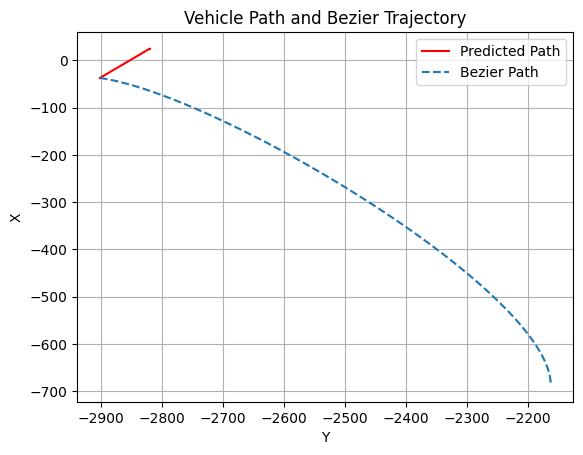

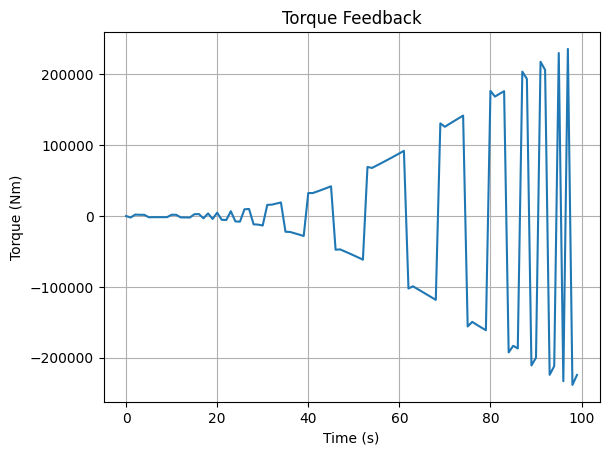

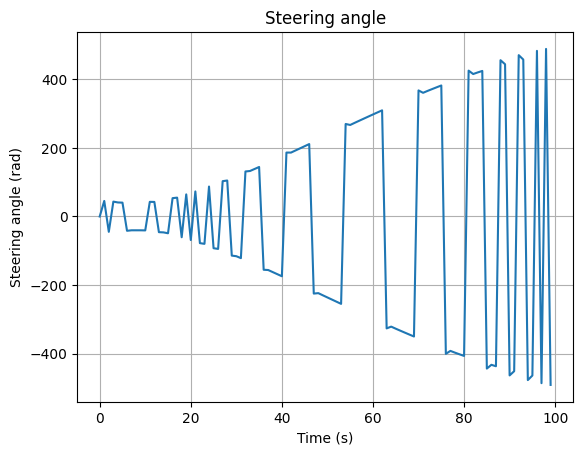

In [54]:
time_step = 1.0
path = path2
param = params2

vehicle_config = Wheel_setting

i_points = P_d[::-1]
f_points = P_f[::-1]
i_yaw = 180 + yaw_d

# Simulation Parameters
# speed = int((f_points[0] - i_points[0]) // 100)
speed = -200
current_position = i_points
current_time = 0

# Haptic Shared Control Initialization
haptic_control = HapticSharedControl(
    Cs=0.5, Kc=0.5, T=2, tp=2, speed=speed, desired_trajectory_params=param, vehicle_config=vehicle_config
)

# Simulation Loop
trajectory = [current_position]
torques = []
steering_angles = [0]
offset_percentage = []
s_angleL = 0
s_angleR = 0

for _ in range(len(path)):
    # print(current_time, current_position, desired_trajectory(current_time), haptic_control.theta_curr)
    # print("\tT:", current_time, "\tP:", current_position, "\tD:", desired_trajectory(current_time), "\tSA:", haptic_control.theta_curr)
    torque, coef, desired_steering_angle  = haptic_control.calculate_torque(
        current_position=current_position,
        steering_wheel_angles=[s_angleL, s_angleR],
        current_yaw_angle=i_yaw,
        t=current_time,
    )

    next_position = haptic_control.predicted_position
    
    trajectory.append(next_position)
    torques.append(torque)
    steering_angles.append(desired_steering_angle)

    current_position = next_position
    s_angleL, s_angleR = desired_steering_angle, desired_steering_angle
    
    current_time += time_step

# Extract trajectory points
trajectory = np.array(trajectory)
x_points = trajectory[:, 0]
y_points = trajectory[:, 1]

# Plot the trajectory

# plt.figure(figsize=(10, 6))
plt.plot(x_points, y_points, label="Predicted Path", color="red")
plt.plot(path[:, 0], path[:, 1], "--", label="Bezier Path")
plt.xlabel("Y")
plt.ylabel("X")
plt.title("Vehicle Path and Bezier Trajectory")
plt.legend()
plt.grid(True)
plt.show()

# plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, current_time, time_step), torques, label="Torque")
plt.xlabel("Time (s)")
plt.ylabel("Torque (Nm)")
plt.title("Torque Feedback")
plt.grid(True)
plt.show()

# plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, current_time, time_step), steering_angles[:-1], label="Steering Angle")
plt.xlabel("Time (s)")
plt.ylabel("Steering angle (rad)")
plt.title("Steering angle")
plt.grid(True)
plt.show()